In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("STRIKE_REPORTS.csv")

C:\Users\gokul\AppData\Local\Temp\ipykernel_42868\1763893204.py:1: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("STRIKE_REPORTS.csv")


In [3]:
selected_columns = ['INCIDENT_MONTH', 'INCIDENT_YEAR', 'LATITUDE', 'LONGITUDE', 'SIZE']
df = df[selected_columns]

In [4]:
encoder = LabelEncoder()
df['SIZE'] = encoder.fit_transform(df['SIZE'].astype(str))

In [5]:
df.fillna(df.mean(), inplace=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [6]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_features)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

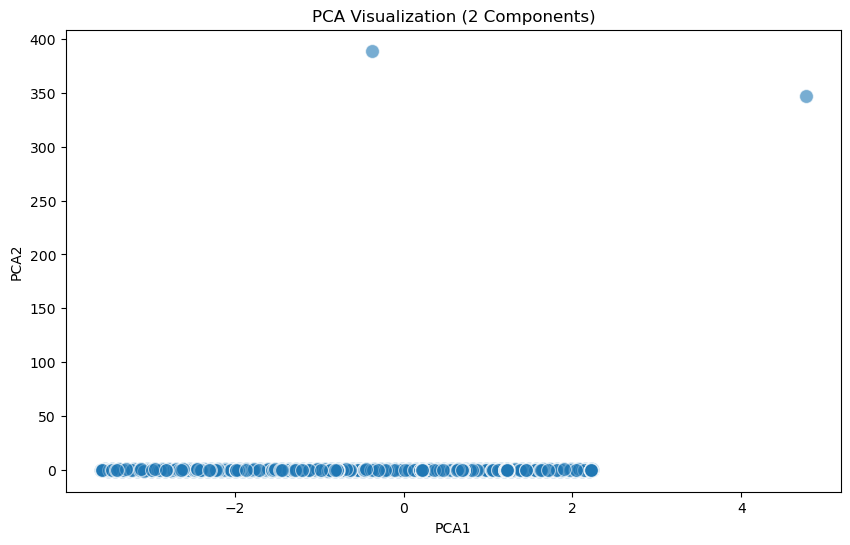

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, alpha=0.6, s=100)
plt.title("PCA Visualization (2 Components)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()